In [1]:
import pandas as pd
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Артем
[nltk_data]     Буданцев\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Артем
[nltk_data]     Буданцев\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
texts_df = pd.read_csv('comments_0-30000.csv').dropna(subset=['text'])

In [3]:
texts = [text.replace('\\n', '\n') for text in texts_df.text]

In [4]:
from nltk.tokenize import word_tokenize
texts_tokens = [[tok for tok in word_tokenize(text.lower(), language='russian') if not tok.startswith('//')] for text in texts]

In [5]:
import pymorphy2
from tqdm import tqdm
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

parser = pymorphy2.MorphAnalyzer()
normalized_texts_tokens = list()
for text in tqdm(texts_tokens):
    new_tokens = [normal_form for tok in text if (normal_form := parser.parse(tok)[0].normal_form) not in russian_stopwords]
    normalized_texts_tokens.append(new_tokens)

normalized_texts_tokens[:10]

100%|█████████████████████████████████████████████████████████████████████████| 229562/229562 [10:05<00:00, 379.21it/s]


[['очередной',
  'теракт',
  'украина',
  'провести',
  '.',
  'ясмотреть',
  'мочь',
  'проживать'],
 ['ночью',
  'наш',
  'войско',
  'хорошенько',
  'пройтись',
  'позиция',
  'всу',
  'геранька',
  'калибр'],
 ['сборище', 'вор', 'преступник'],
 ['ставить', 'охрана'],
 ['солидный',
  'инстумент',
  ',',
  'обкатать',
  'передок',
  'сво',
  '.',
  'достойный',
  '``',
  'внук',
  "''",
  'свд',
  '.'],
 ['🇷🇺🇷🇺🇷🇺приятный',
  'видеть',
  ',',
  'легендарный',
  'образец',
  'русский',
  'оружие',
  'иметь',
  'продолжение',
  'апгрейта',
  '!',
  '!',
  '!',
  '👍'],
 ['начало',
  'это',
  'год',
  'президент',
  'россия',
  'владимир',
  'путин',
  'посетить',
  'концерн',
  '«',
  'калашников',
  '»',
  ',',
  'изготовитель',
  '«',
  'свч',
  '»',
  ',',
  'произвести',
  'несколько',
  'выстрел',
  '.',
  'снайперский',
  'винтовка',
  'чукавино',
  'получить',
  'широкий',
  'известность',
  'появление',
  'пресса',
  'фотография',
  ',',
  'который',
  'запечатлеть',
  'стрелять'

In [6]:
import gensim
tagged_normalized_texts_tokens = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(normalized_texts_tokens)]

D:\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


[TaggedDocument(words=['очередной', 'теракт', 'украина', 'провести', '.', 'ясмотреть', 'мочь', 'проживать'], tags=[0]),
 TaggedDocument(words=['ночью', 'наш', 'войско', 'хорошенько', 'пройтись', 'позиция', 'всу', 'геранька', 'калибр'], tags=[1]),
 TaggedDocument(words=['сборище', 'вор', 'преступник'], tags=[2]),
 TaggedDocument(words=['ставить', 'охрана'], tags=[3]),
 TaggedDocument(words=['солидный', 'инстумент', ',', 'обкатать', 'передок', 'сво', '.', 'достойный', '``', 'внук', "''", 'свд', '.'], tags=[4]),
 TaggedDocument(words=['🇷🇺🇷🇺🇷🇺приятный', 'видеть', ',', 'легендарный', 'образец', 'русский', 'оружие', 'иметь', 'продолжение', 'апгрейта', '!', '!', '!', '👍'], tags=[5]),
 TaggedDocument(words=['начало', 'это', 'год', 'президент', 'россия', 'владимир', 'путин', 'посетить', 'концерн', '«', 'калашников', '»', ',', 'изготовитель', '«', 'свч', '»', ',', 'произвести', 'несколько', 'выстрел', '.', 'снайперский', 'винтовка', 'чукавино', 'получить', 'широкий', 'известность', 'появление', 

In [22]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=64, min_count=2, epochs=200)
model.build_vocab(tagged_normalized_texts_tokens)
model.train(tagged_normalized_texts_tokens, total_examples=model.corpus_count, epochs=model.epochs)

In [23]:
texts_vectors = np.array([model.infer_vector(text.words) for text in tqdm(tagged_normalized_texts_tokens)])
texts_vectors[:3]

100%|████████████████████████████████████████████████████████████████████████| 229562/229562 [1:54:41<00:00, 33.36it/s]


array([[-1.4569806 , -0.8762057 ,  0.07472531, -0.19526668,  0.04117819,
         1.8887558 , -0.33913627,  1.3489343 , -0.31276655,  0.2119645 ,
        -1.75394   ,  1.2764117 , -1.5562482 , -0.09257868,  1.40342   ,
         1.0076128 , -0.42109352,  0.18634489,  0.18889922,  0.35129935,
         0.8691954 ,  0.8436832 , -0.25612655,  0.30626073, -1.2136564 ,
         0.81917214, -0.38288814, -0.84723824,  0.1897239 ,  2.3849711 ,
         0.6749619 ,  1.7640097 , -1.3217896 , -0.48030424, -0.07152723,
         0.95444566, -1.3595755 ,  1.3328327 , -2.3423862 ,  0.08602834,
        -0.17522167, -0.3908285 ,  0.26273742,  1.912222  ,  0.45010227,
         0.59504545, -0.49396315,  1.1903229 , -1.8980677 ,  0.24703105,
        -0.8353053 ,  0.16397159,  1.2020665 , -0.86033064,  1.0749892 ,
         2.3539987 ,  1.1596211 ,  0.7977468 ,  1.6864969 ,  0.90568274,
         0.9202513 ,  0.00899437,  2.1076596 , -0.16769722],
       [ 0.86823124,  0.63883847, -2.172475  , -1.3571783 ,  1.

In [24]:
from umap import UMAP
umap = UMAP(metric='cosine')
proj_texts = umap.fit_transform(texts_vectors)

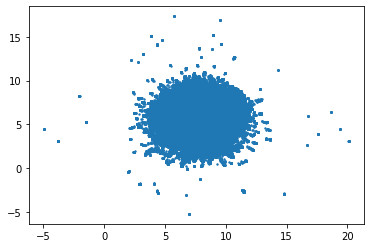

In [25]:
from matplotlib import pyplot as plt

plt.scatter(proj_texts[:, 0], proj_texts[:, 1], s=2)
plt.show()

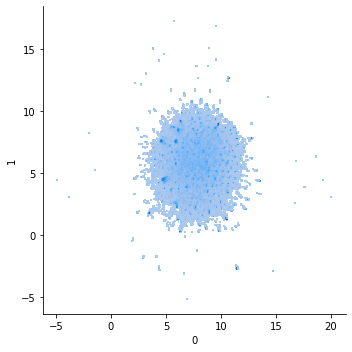

In [26]:
import seaborn as sns

sns.displot(pd.DataFrame(proj_texts, columns=['0', '1']), x='0', y='1')

In [27]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import normalize
clust_alg = DBSCAN(eps=0.001, metric='cosine', min_samples=70)

clusters = clust_alg.fit_predict(texts_vectors)
# clusters = clust_alg.fit_predict(proj_texts)
max(clusters)

-1

In [28]:
import colorsys
dot_colors = [colorsys.hsv_to_rgb(i / (max(clusters) + 1), 1.0, 1.0) for i in range(max(clusters) + 1)]
filtered_proj_texts = proj_texts[clusters != -1]
filtered_clusters = clusters[clusters != -1]
noisy_proj_texts = proj_texts[clusters == -1]
print(len(filtered_proj_texts))

0


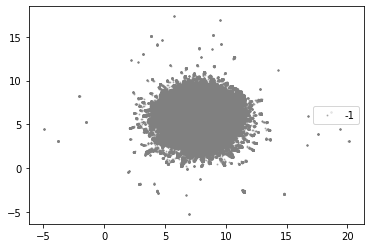

In [29]:
# %matplotlib notebook
%matplotlib inline
plt.scatter(noisy_proj_texts[:, 0], noisy_proj_texts[:, 1], 
            s=1, 
            c='#80808080',
            label=-1)
for clust_id in range(max(clusters) + 1):
    clust_texts = proj_texts[clusters == clust_id]
    plt.scatter(clust_texts[:, 0], clust_texts[:, 1], 
                s=5, 
                color=dot_colors[clust_id], 
                label=clust_id)
plt.legend(loc='right')
plt.show()

In [30]:
for clust_id in clusters:
    if clust_id not in (-1, 0):
        texts_df.iloc[[i for i in range(len(clusters)) if clusters[i] == clust_id]].to_csv(f'texts_clust{clust_id}.csv')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(texts_vectors, texts_df.likes.to_numpy(), test_size=0.1)

reg = LinearRegression().fit(X_train, y_train)
# reg = MLPRegressor(learning_rate_init=0.05, hidden_layer_sizes=(64,)).fit(X_train, y_train)

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg.predict(X_train), y_train) ** 0.5 / y_train.std(), mean_squared_error(reg.predict(X_test), y_test) ** 0.5 / y_test.std()

(0.9952581981488131, 0.994377891381643)

In [33]:
list(zip(reg.predict(X_train), y_train))[:20]

[(2.787294, 2),
 (4.762044, 0),
 (2.4589534, 2),
 (2.6427002, 1),
 (3.4573774, 0),
 (3.4234405, 5),
 (5.981724, 0),
 (1.4409647, 1),
 (4.609416, 6),
 (2.5650427, 0),
 (3.3499873, 1),
 (3.2700644, 4),
 (5.870446, 0),
 (3.3811147, 0),
 (2.7359872, 0),
 (4.75057, 0),
 (2.105403, 0),
 (3.373696, 5),
 (2.5717306, 2),
 (2.595242, 0)]